
<i>Edge detection is a fundamental technique in image processing used to identify boundaries or edges within an image. The primary idea behind edge detection is to locate areas in an image where there are significant changes in intensity, such as sharp transitions in pixel values. <br>
These changes often correspond to the presence of object boundaries, discontinuities in texture, or variations in color or illumination.

### Implementation of Sobel filter

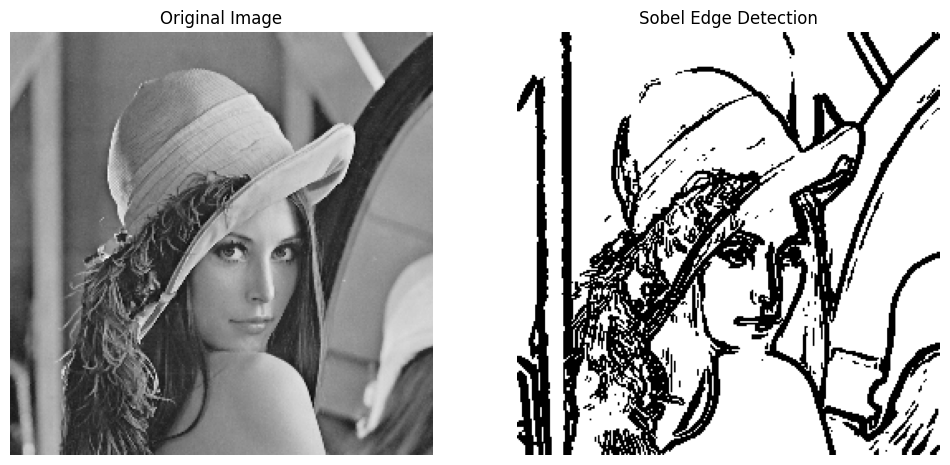

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img2.png", cv2.IMREAD_GRAYSCALE)

# Apply Sobel filters for horizontal and vertical edges
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5) # cV_64F,1,0 converts the image between range 0-1 which is normalization basically and prevents negative or values>255
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5) #ksize is the kernal or window size which should be odd

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

# Thresholding gradient magnitude for visualization
threshold = 1000
thresholded = np.where(gradient_magnitude > threshold, 255, 0).astype(np.uint8) # if gradient_magnitude>threshold-> 255 is given otherwise 0

# Display the resulting images
plt.figure(figsize=(12, 6))

plt.subplot(121) 
plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(122)
plt.imshow(thresholded, cmap='binary')
plt.title('Sobel Edge Detection'), plt.axis('off')

plt.show()


### Laplacian filter

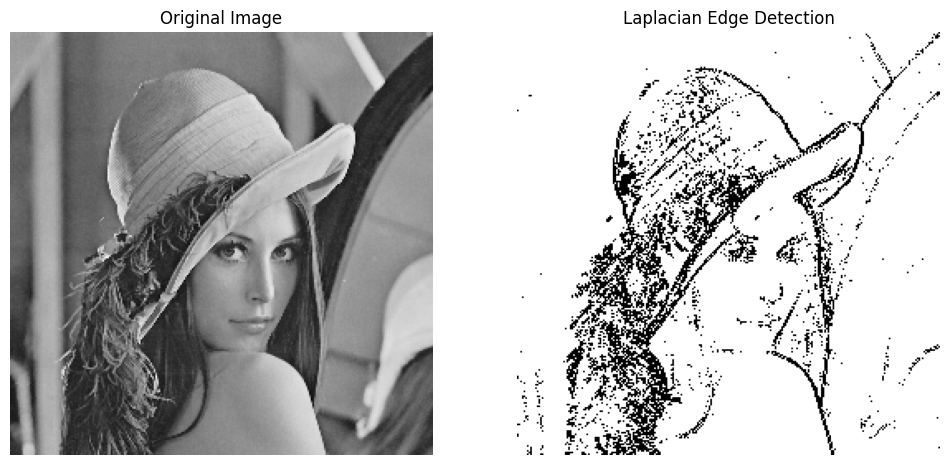

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img2.png", cv2.IMREAD_GRAYSCALE)

# Apply Laplacian filter
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Convert the result to absolute values
abs_laplacian = np.absolute(laplacian)

# Thresholding gradient magnitude for visualization
threshold = 50
thresholded = np.where(abs_laplacian > threshold, 255, 0).astype(np.uint8)

# Display the resulting images
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(122)
plt.imshow(thresholded, cmap='binary')
plt.title('Laplacian Edge Detection'), plt.axis('off')

plt.show()


User-defined Laplacian

256
given image is of 8 bits


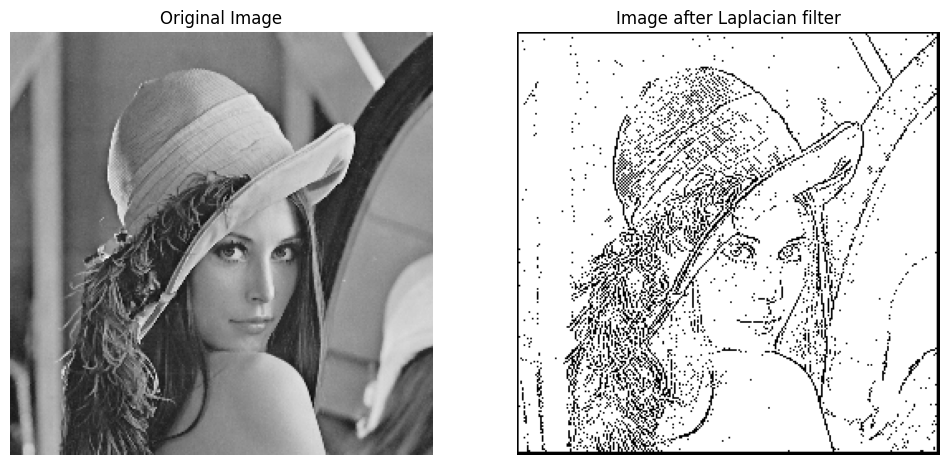

In [51]:
# Laplacian filter
import math
import cv2 as cv
img1= cv.imread("img2.png", cv.IMREAD_GRAYSCALE)

img = img1

def laplacian(img):
 
    bits = int(2 ** math.ceil(math.log(img.max(),2) / math.log(2,2)))

    print(bits)

    print(f"given image is of {round(math.log(bits,2))} bits")
    img =  img.astype(np.float64) / 255.0  # Normalize pixel values to the range [0, 1]


    height, width = img.shape
    img_arr = None
    img_arr = np.zeros_like(img)
    img_arr.shape
    for i in range(1,height-2):
        for j in range(1,width-2):
            # code here
            new_value = None
            new_value= (-4*img[i,j] + img[i-1,j] + img[i+1,j] + img[i,j+1] + img[i,j-1]) 
            if new_value>(30/255):  # since the intensity values are normalized between 0-1
                img_arr[i,j] = 0
            else:
                img_arr[i,j] = 255
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    #plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 2)
    plt.title('Image after Laplacian filter')
    plt.imshow(img_arr, cmap='gray')
    plt.axis('off')
#laplacian(img)
    
img_laplace = cv.imread("img2.png", cv.IMREAD_GRAYSCALE)
laplacian(img_laplace)
